In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.shape

(400, 5)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [28]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,1,19,19000,0,1
1,15810944,1,35,20000,0,1
2,15668575,0,26,43000,0,0
3,15603246,0,27,57000,0,0
4,15804002,1,19,76000,0,1


In [30]:
df = df.drop('Gender_encoded', axis=1)

In [31]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [32]:
data_mean = df.mean()
print("Mean of data is: ", data_mean)
print("\n\n")
data_median = df.median()
print("Median of data is: ", data_median)
print("\n\n")
data_mode = df['Gender'].mode()
print("Mode of data is: ", data_mode)
print("\n\n")
data_std = df.std()
print("Standard Deviation of data is: ", data_std)
print("\n\n")

Mean of data is:  User ID            1.569154e+07
Gender             4.900000e-01
Age                3.765500e+01
EstimatedSalary    6.974250e+04
Purchased          3.575000e-01
dtype: float64



Median of data is:  User ID            15694341.5
Gender                    0.0
Age                      37.0
EstimatedSalary       70000.0
Purchased                 0.0
dtype: float64



Mode of data is:  0    0
Name: Gender, dtype: int64



Standard Deviation of data is:  User ID            71658.321581
Gender                 0.500526
Age                   10.482877
EstimatedSalary    34096.960282
Purchased              0.479864
dtype: float64





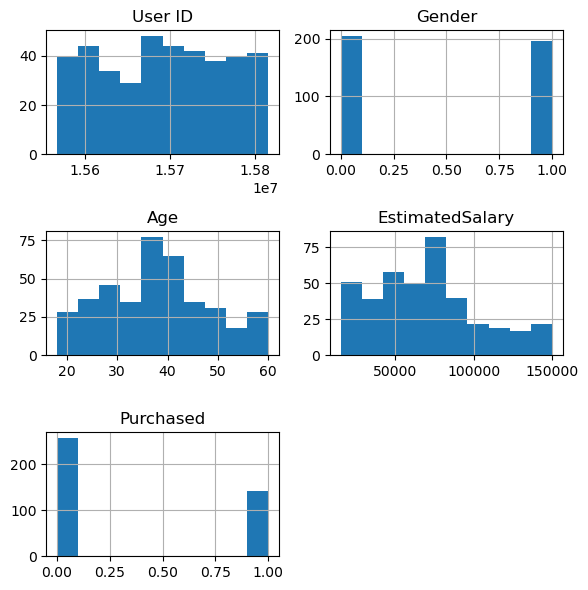

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
df.hist(figsize=(6, 6))
plt.tight_layout()
plt.show()

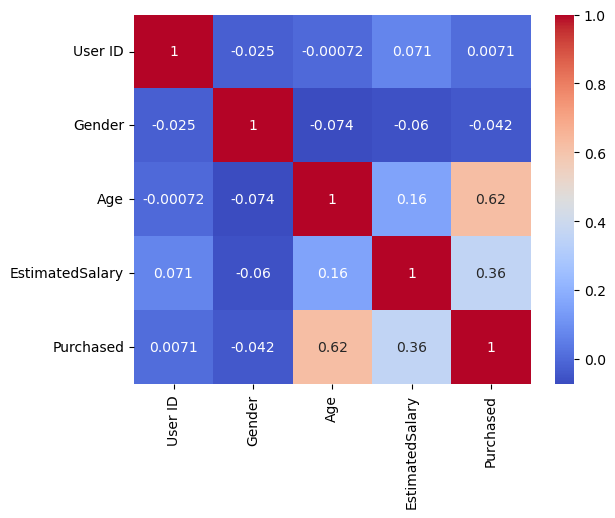

In [34]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:-1], df.iloc[:, -1], test_size = 0.2, random_state = 10)
print(len(x_train))
print(len(x_test))

320
80


In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error, mean_absolute_error
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [50]:
y_pred = model.predict(x_test)

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

Accuracy: 0.875
F1 Score: 0.8709090909090909
R² Score: 0.4505494505494506
Mean Squared Error (MSE): 0.125
Mean Absolute Error (MAE): 0.125


In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:-1], df.iloc[:, -1], test_size = 0.2, random_state = 10)
print(len(x_train))
print(len(x_test))

320
80


In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [54]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error, mean_absolute_error
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

Accuracy: 0.9
F1 Score: 0.9017774851876235
R² Score: 0.5604395604395604
Mean Squared Error (MSE): 0.1
Mean Absolute Error (MAE): 0.1


In [57]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

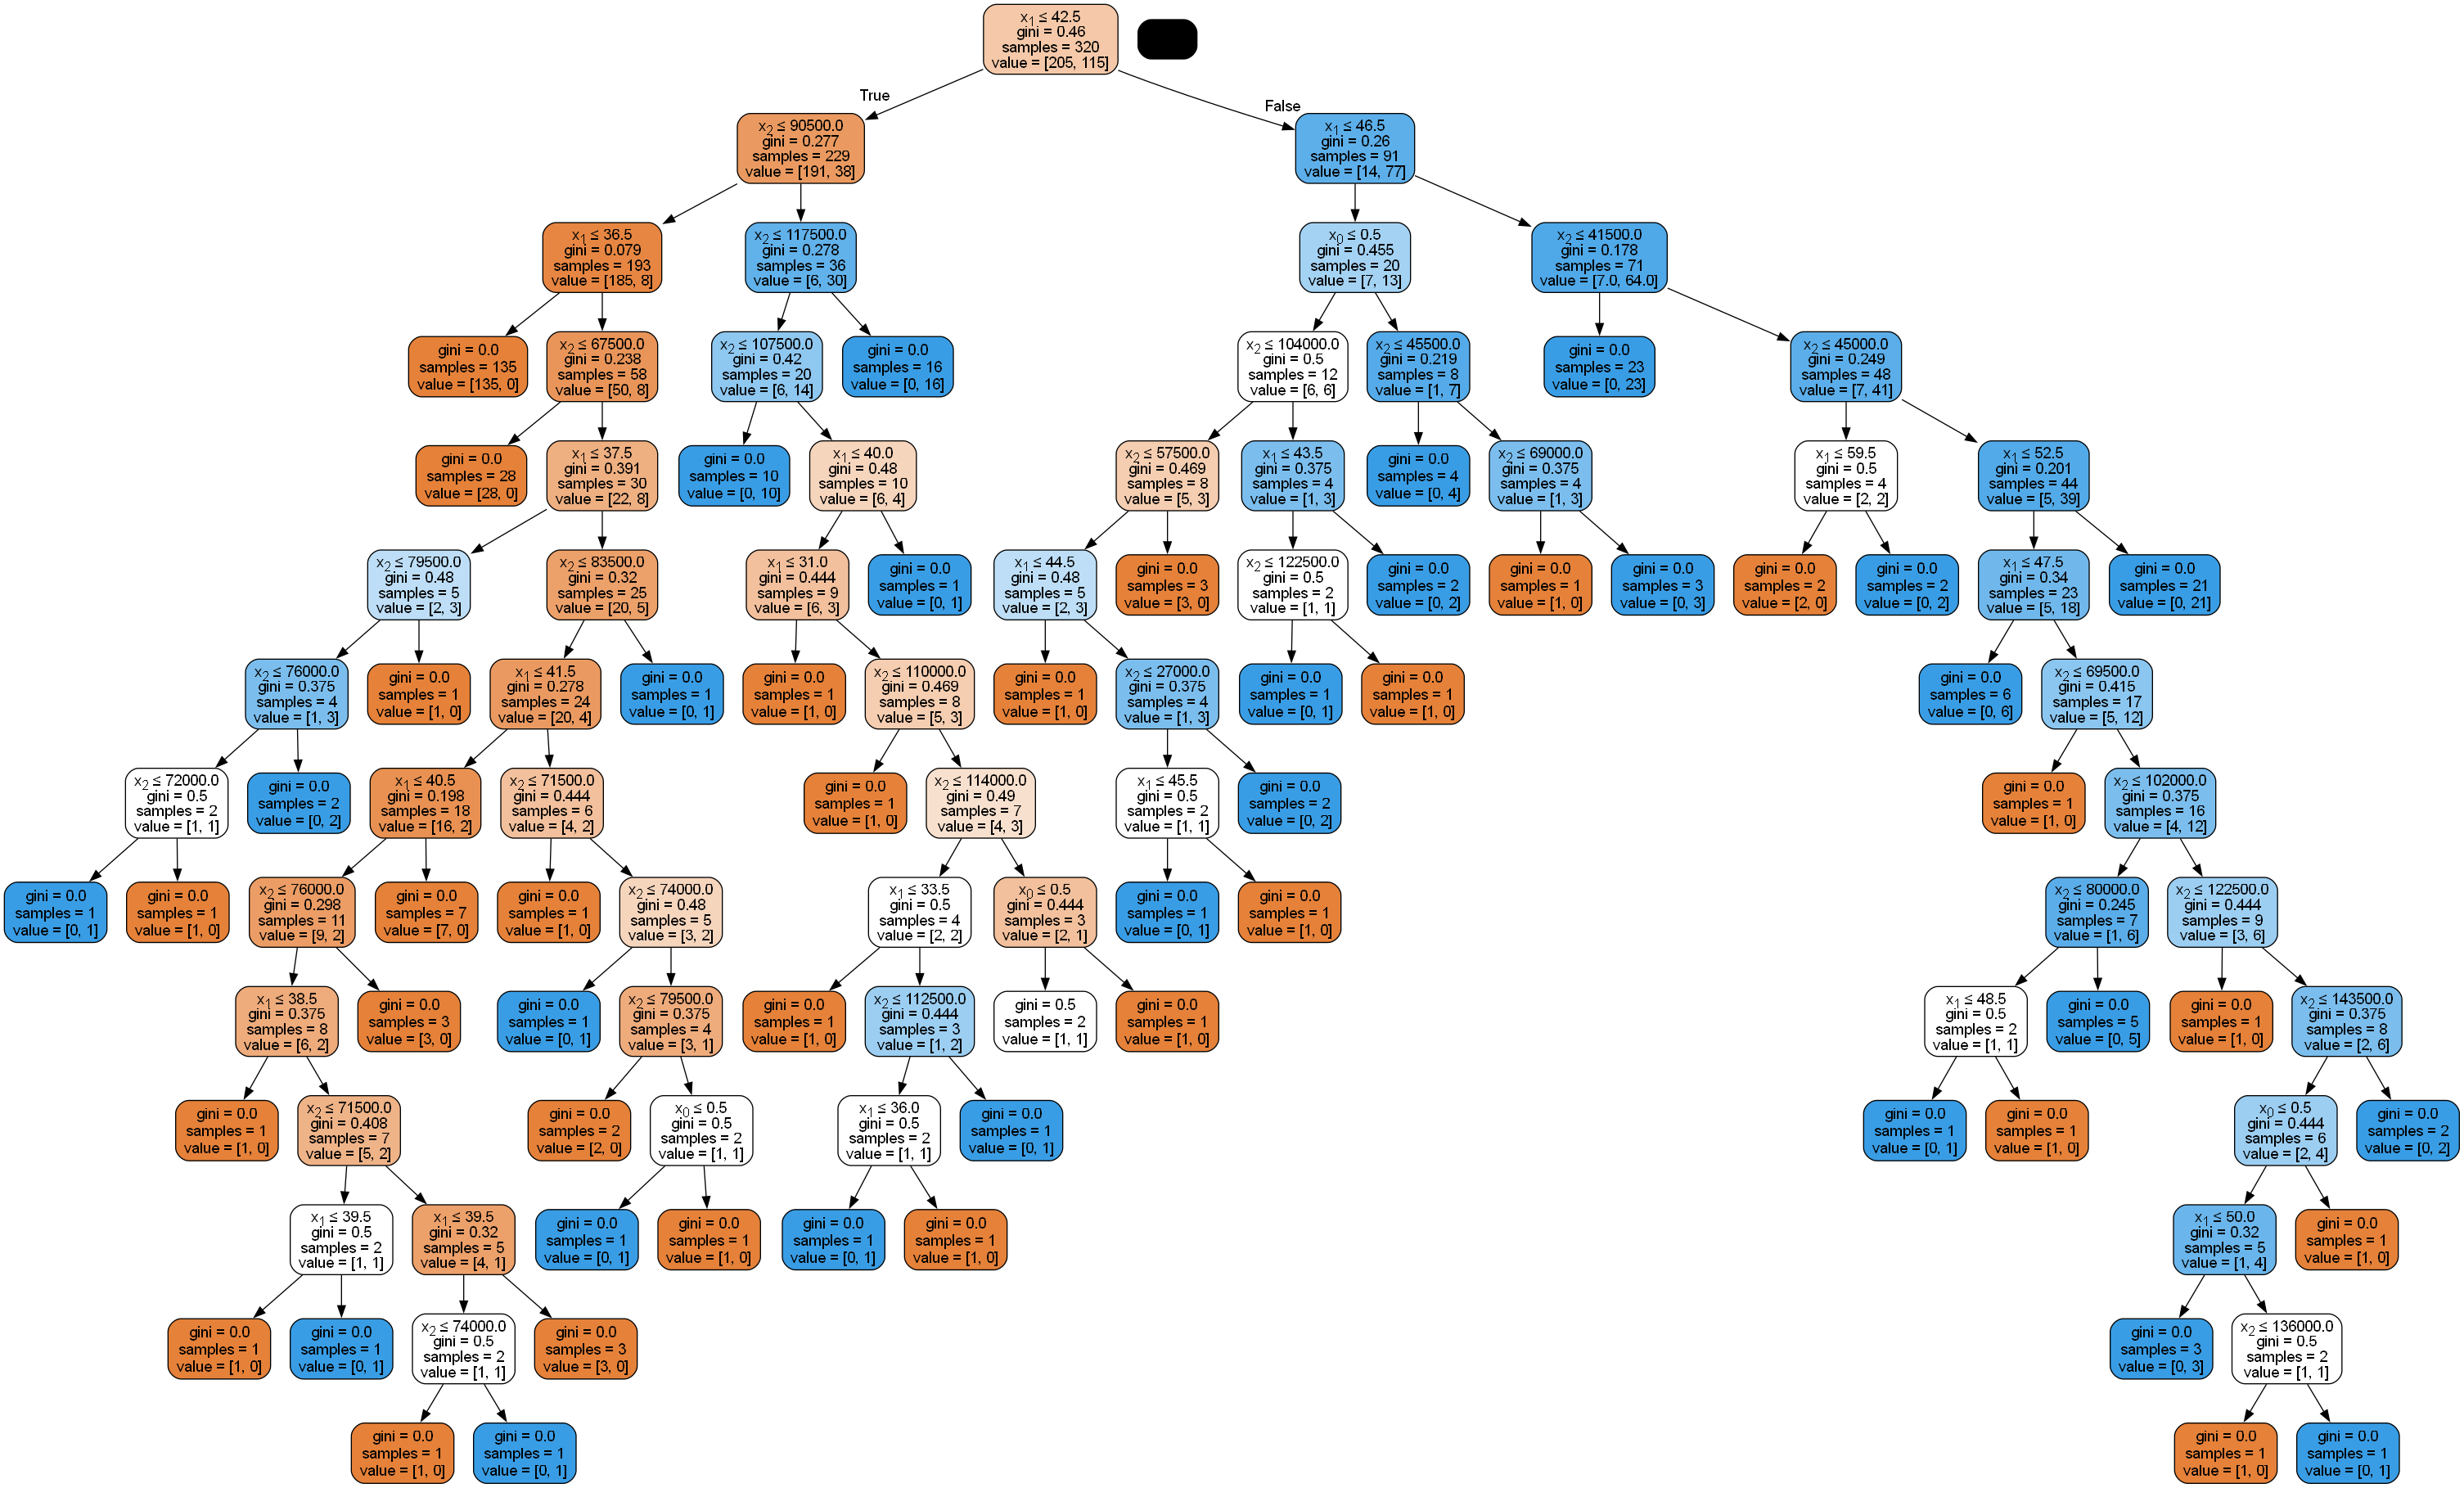

In [58]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

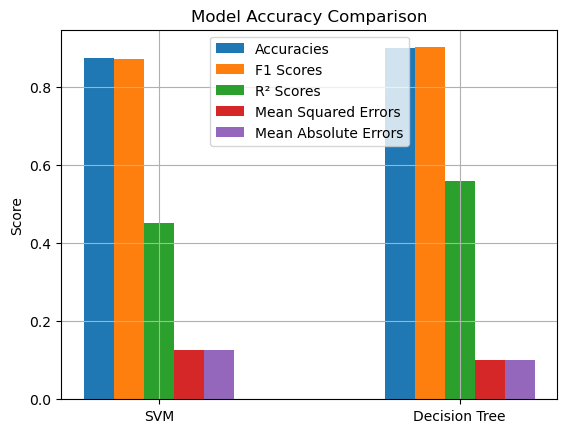

In [67]:
import matplotlib.pyplot as plt
import numpy as np

sv_accuracy = 0.875
sv_f1score = 0.8709090909090909
sv_r2score = 0.4505494505494506
sv_mse = 0.125
sv_mae = 0.125

dt_accuracy = 0.9
dt_f1score = 0.9017774851876235
dt_r2score = 0.5604395604395604
dt_mse = 0.1
dt_mae = 0.1

models = ['SVM', 'Decision Tree']
accuracies = [sv_accuracy, dt_accuracy]
f1scores = [sv_f1score, dt_f1score]
r2scores = [sv_r2score, dt_r2score]
mses = [sv_mse, dt_mse]
maes = [sv_mae, dt_mae]

x = np.arange(len(models))
width = 0.10

plt.xticks(x, models)
plt.bar(x - 2*width, accuracies, width, label='Accuracies')
plt.bar(x - width, f1scores, width, label='F1 Scores')
plt.bar(x, r2scores, width, label='R² Scores')
plt.bar(x + width, mses, width, label='Mean Squared Errors')
plt.bar(x + 2*width, maes, width, label='Mean Absolute Errors')
plt.ylabel('Score')
plt.title('Model Accuracy Comparison')
plt.grid(True)
plt.legend()
plt.show()